# 주어진 문제
1. 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요?
2. 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('Jobis_3o3.csv')
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


# 주어진 데이터
- age: 고객의 만 나이입니다.
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

# 분석방법론


In [3]:
# 수수료를 지불한 사람은 1, 그렇지 않은 사람은 0
df['has_paid'] = df['has_paid'].apply(lambda x: 1 if x else 0)

In [4]:
df['has_paid'].value_counts()

1    64643
0    35357
Name: has_paid, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  int64  
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 6.9+ MB


- 근로소득, 사업소득, 기타소득이 결측값인 경우, 해당 소득이 0인 것으로 생각할 수 있음.

In [6]:
# 결측값을 0으로 변환
df.fillna(0, inplace=True)

## 칼럼별로 살펴보기 (문자형)

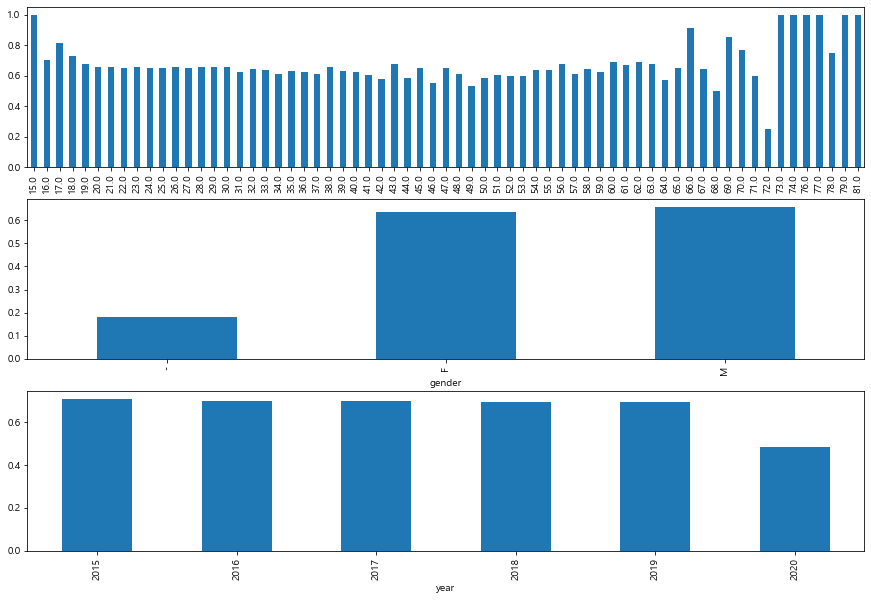

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(311)
df.groupby('age')['has_paid'].mean().sort_index().plot(kind='bar')
plt.subplot(312)
df.groupby('gender')['has_paid'].mean().sort_values().plot(kind='bar')
plt.subplot(313)
df.groupby('year')['has_paid'].mean().sort_index().plot(kind='bar')
plt.show()

1. 72세가 유독 환급을 받지 않음.-> 몇 명이나 있는지?
2. 성별에 결측치가 있음 -> 어떻게 판단할 것인가?
3. 2020년에 발생한 수익에 대한 세금을 유독 환급 받지 않음

In [8]:
# 70대 이상은 몇명?
df[df['age']>=70]['age'].value_counts()

70.0    13
76.0     7
74.0     5
71.0     5
78.0     4
72.0     4
81.0     3
77.0     2
73.0     1
79.0     1
Name: age, dtype: int64

1. 환급전환율이 적은 72세 뿐만 아니라, 70대 이상이 매우 적은 숫자이므로 큰 의미는 없음.

In [9]:
# 성별의 결측치는 몇개?
df['gender'].value_counts()

M    50477
F    49501
-       22
Name: gender, dtype: int64

2. 22개의 결측치는 전체 데이터 대비 매우 적은 숫자이므로 큰 의미는 없음.

In [10]:
# 연도별로 어떤 차이가 있는가?
df.groupby('year').mean()

,age,refund,fee,has_paid,income_근로,income_사업,income_기타
year,,,,,,,
2015,30.748808,162656.210790,4396.461731,0.710665,4.291267e+05,7.168088e+05,32737.766625
2016,30.553511,171084.237763,5579.752749,0.697046,1.993295e+06,9.055580e+05,151482.714008
2017,29.636296,176735.467276,5852.214919,0.697571,2.125833e+06,9.553367e+05,150700.428694
2018,28.836261,179430.415853,5994.825602,0.694991,2.542636e+06,9.500879e+05,154357.203623
2019,28.228049,173935.226946,5831.383744,0.694799,3.115681e+06,8.984142e+05,135792.150465
2020,28.148179,314651.459087,12021.541502,0.485241,3.364365e+06,2.034195e+06,222154.402489


In [11]:
df_describe = df.groupby('year').mean()

In [12]:
# 타 연도 평균 대비 2020년
df_describe[df_describe.index == 2020].mean() / df_describe[df_describe.index != 2020].mean() * 100

age           95.093321
refund       182.123363
fee          217.351266
has_paid      69.417887
income_근로    164.813662
income_사업    229.789935
income_기타    177.703544
dtype: float64

**3. 사업소득과 결제수수료가 매우 큰 폭으로 증가했기 때문에 2020년의 수수료 결제 비율이 줄어들었다고 유추할 수 있다.**
#### 따라서 사업 소득과 결제수수료 위주로 action plan을 제시하는 것이 좋아보인다.

## 칼럼별로 살펴보기 (숫자형)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='income_기타', ylabel='Density'>

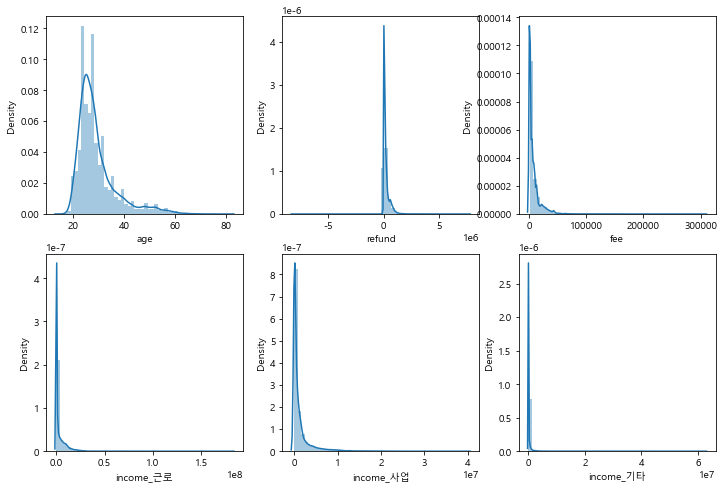

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(231)
sns.distplot(df['age'])
plt.subplot(232)
sns.distplot(df['refund'])
plt.subplot(233)
sns.distplot(df['fee'])
plt.subplot(234)
sns.distplot(df['income_근로'])
plt.subplot(235)
sns.distplot(df['income_사업'])
plt.subplot(236)
sns.distplot(df['income_기타'])

- 예상 환급액이 음수인 경우는 뭘까?

In [14]:
df[df['refund']<0]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
10034,34.0,M,2015,-231000.0,8500.0,1,8989000.0,1714000.0,0.0
10624,25.0,F,2018,-7000.0,400.0,1,7508000.0,28000.0,0.0
22506,32.0,F,2019,-5000.0,400.0,0,7118000.0,259000.0,0.0
29515,41.0,F,2017,-10000.0,400.0,1,19718000.0,162000.0,128000.0
52648,26.0,F,2020,-397000.0,1300.0,0,8175000.0,247000.0,0.0
52858,34.0,M,2017,-2328000.0,400.0,0,16759000.0,28000.0,441000.0
54256,48.0,F,2018,-948000.0,3000.0,1,8157000.0,3975000.0,0.0
55168,28.0,F,2020,-1658000.0,1700.0,0,10509000.0,570000.0,0.0
57756,38.0,F,2017,-107000.0,4300.0,1,16619000.0,737000.0,0.0
68881,33.0,M,2016,-322000.0,400.0,1,0.0,57000.0,0.0


- 삼쩜삼 서비스 설명에 따르면 수수료를 결제 했는데 환급을 못받는 경우, 수수료는 다시 환불된다. 따라서 신경 쓰지 않아도 될 것으로 보인다.

[떼인 세금 삼쩜삼%, 환급 ‘가능vs불가능’ 케이스](https://help.jobis.co/hc/ko/articles/900003046406-%EB%96%BC%EC%9D%B8-%EC%84%B8%EA%B8%88-%EC%82%BC%EC%A9%9C%EC%82%BC-%ED%99%98%EA%B8%89-%EA%B0%80%EB%8A%A5vs%EB%B6%88%EA%B0%80%EB%8A%A5-%EC%BC%80%EC%9D%B4%EC%8A%A4)

## 각 칼럼들간의 상관관계

In [15]:
df.corr()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타
age,1.000000,-0.113500,0.078485,0.072135,-0.022918,0.217894,0.069412,0.054130
year,-0.113500,1.000000,0.140977,0.169537,-0.136060,0.124501,0.153693,0.036665
refund,0.078485,0.140977,1.000000,0.969427,-0.094061,-0.079797,0.610592,0.507695
fee,0.072135,0.169537,0.969427,1.000000,-0.117695,-0.079523,0.601112,0.531414
has_paid,-0.022918,-0.136060,-0.094061,-0.117695,1.000000,0.048247,-0.014917,-0.044802
income_근로,0.217894,0.124501,-0.079797,-0.079523,0.048247,1.000000,-0.086807,0.098044
income_사업,0.069412,0.153693,0.610592,0.601112,-0.014917,-0.086807,1.000000,-0.049067
income_기타,0.054130,0.036665,0.507695,0.531414,-0.044802,0.098044,-0.049067,1.000000


<AxesSubplot:>

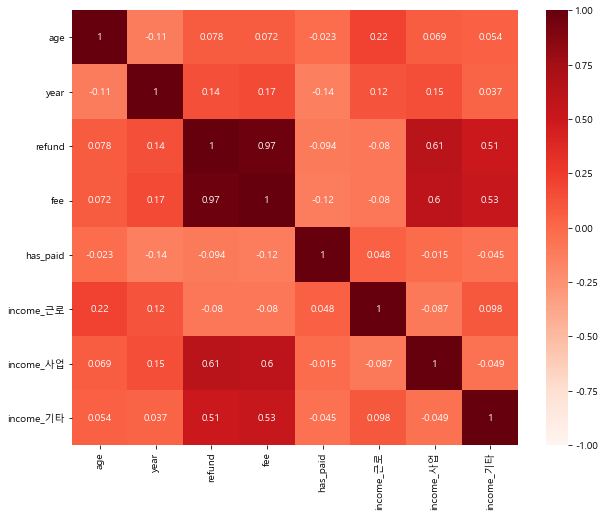

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data = df.corr(), annot=True, cmap='Reds',vmin=-1,vmax=1)

- refund(예상환금액)과 상관관계가 있는 요소: fee(수수료), 사업소득, 기타소득
- has_paid(수수료 결제여부)와 그나마 상관관계가 있는 요소: year, fee

In [17]:
# 예상환급액 대비 수수료 칼럼 추가
df['예상환급액_대비_수수료(%)'] = df['fee'] / df['refund'] * 100

In [18]:
# 소득 합계 칼럼 추가
df['income_합계'] = df['income_근로'] + df['income_사업'] + df['income_기타']

# segment 나누기 1) 연령별

### 연령별 income_합계를 시각화하여 연령대별 소득구간으로 묶어보자.

<AxesSubplot:xlabel='age', ylabel='income_합계'>

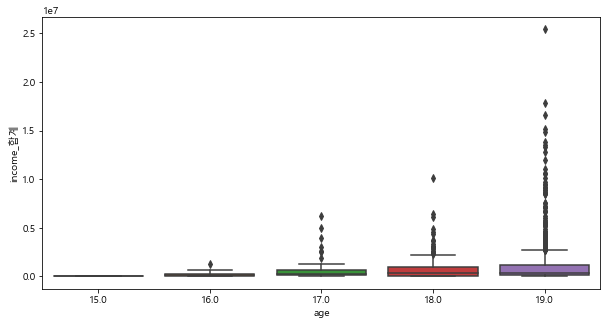

In [19]:
# 10대
plt.figure(figsize=(10,5))
sns.boxplot(data = df[df['age']<20], x ='age',y='income_합계')

<AxesSubplot:xlabel='age', ylabel='income_합계'>

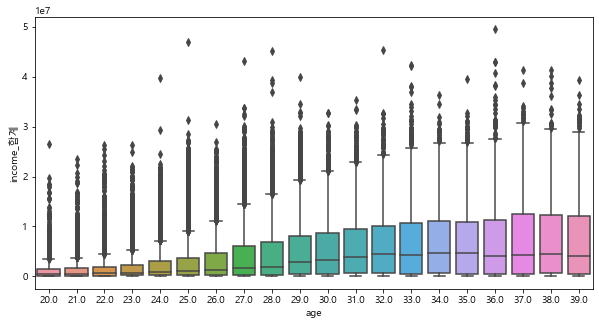

In [20]:
# 20대~30대
plt.figure(figsize=(10,5))
sns.boxplot(data = df[(df['age'] >= 20) & (df['age']<40)], x ='age',y='income_합계')

<AxesSubplot:xlabel='age', ylabel='income_합계'>

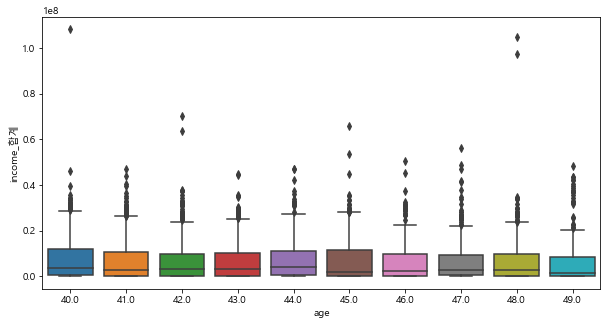

In [21]:
# 40대
plt.figure(figsize=(10,5))
sns.boxplot(data = df[(df['age'] >= 40) & (df['age']<50)], x ='age',y='income_합계')

<AxesSubplot:xlabel='age', ylabel='income_합계'>

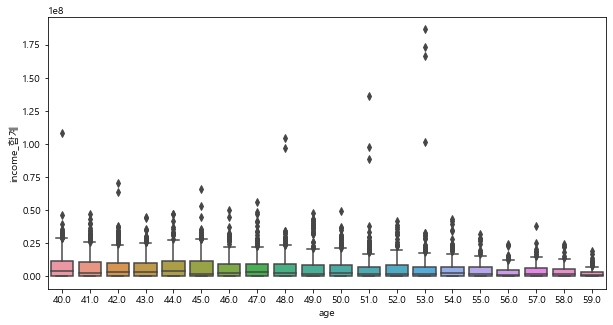

In [22]:
# 40대~50대
plt.figure(figsize=(10,5))
sns.boxplot(data = df[(df['age'] >= 40) & (df['age']<60)], x ='age',y='income_합계')

<AxesSubplot:xlabel='age', ylabel='income_합계'>

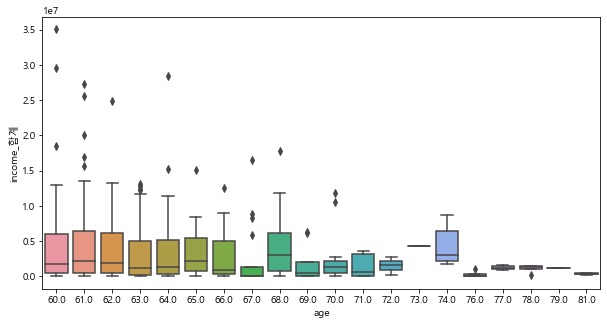

In [23]:
# 60대~80대
plt.figure(figsize=(10,5))
sns.boxplot(data = df[(df['age'] >= 60) & (df['age']<90)], x ='age',y='income_합계')

In [24]:
def age_category(age):
    category =''
    if age < 20:
        category = '10대'
    elif 20 <= age <= 23:
        category = '20대초반'
    elif 24 <= age <= 26:
        category = '20대중반'
    elif 27 <= age <= 29:
        category = '20대후반'
    elif 30 <= age <= 33:
        category = '30대초반'
    elif 34 <= age <= 36:
        category = '30대중반'
    elif 37 <= age <= 39:
        category = '30대후반'
    elif age < 50:
        category = '40대'
    elif age < 60:
        category = '50대'
    elif age < 70:
        category = '60대'
    else:
        category = '70대이상'
    return category

In [25]:
df['연령대'] = df['age'].apply(age_category)

## 연령대별 결제비율

In [26]:
pd.DataFrame(df.groupby('연령대')['has_paid'].mean())

,has_paid
연령대,
10대,0.692729
20대중반,0.652642
20대초반,0.654712
20대후반,0.653160
30대중반,0.622094
30대초반,0.641802
30대후반,0.632556
40대,0.610124
50대,0.617035


<AxesSubplot:xlabel='연령대', ylabel='has_paid'>

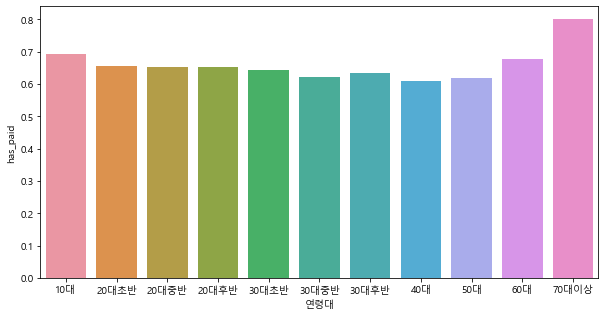

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data = pd.DataFrame(df.groupby('연령대')['has_paid'].mean()), 
            x=pd.DataFrame(df.groupby('연령대')['has_paid'].mean()).index,
            y= 'has_paid',
           order = ['10대','20대초반','20대중반','20대후반','30대초반','30대중반','30대후반','40대','50대','60대','70대이상'])

- 70대 이상을 제외한 대부분 60~70% 결제율을 보인다.
- 그러나 70대 이상은 80%의 결제율을 보이지만, 데이터의 수가 매우 적으므로 나이대별로 큰 차이를 보이지는 않는다.

# Segment 나누기 2) 환급 예상 금액별

In [28]:
df['refund'].describe()

count    1.000000e+05
mean     2.081422e+05
std      3.071744e+05
min     -8.265000e+06
25%      3.300000e+04
50%      9.900000e+04
75%      2.540000e+05
max      7.725000e+06
Name: refund, dtype: float64

In [29]:
# 10개의 구간으로 나누기
pd.qcut(df[df['refund']>0]['refund'],10)

0          (999.999, 11000.0]
1         (99000.0, 144000.0]
2        (211000.0, 312000.0]
3        (312000.0, 585000.0]
4         (99000.0, 144000.0]
                 ...         
99995    (211000.0, 312000.0]
99996      (66000.0, 99000.0]
99997      (999.999, 11000.0]
99998      (24000.0, 42000.0]
99999      (24000.0, 42000.0]
Name: refund, Length: 99924, dtype: category
Categories (10, interval[float64]): [(999.999, 11000.0] < (11000.0, 24000.0] < (24000.0, 42000.0] < (42000.0, 66000.0] ... (144000.0, 211000.0] < (211000.0, 312000.0] < (312000.0, 585000.0] < (585000.0, 7725000.0]]

In [30]:
df['refund_구간'] = pd.qcut(df[df['refund']>0]['refund'],10)

In [31]:
df[df['refund_구간'].isna()]['refund'].value_counts()

-0.0          61
-683000.0      1
-2328000.0     1
-89000.0       1
-231000.0      1
-583000.0      1
-1658000.0     1
-107000.0      1
-175000.0      1
-8265000.0     1
-948000.0      1
-322000.0      1
-397000.0      1
-10000.0       1
-5000.0        1
-7000.0        1
Name: refund, dtype: int64

In [32]:
df.groupby('refund_구간')['has_paid'].count()

refund_구간
(999.999, 11000.0]       10836
(11000.0, 24000.0]        9161
(24000.0, 42000.0]       10345
(42000.0, 66000.0]        9828
(66000.0, 99000.0]       10015
(99000.0, 144000.0]       9921
(144000.0, 211000.0]      9876
(211000.0, 312000.0]      9972
(312000.0, 585000.0]      9982
(585000.0, 7725000.0]     9988
Name: has_paid, dtype: int64

<AxesSubplot:xlabel='refund_구간', ylabel='has_paid'>

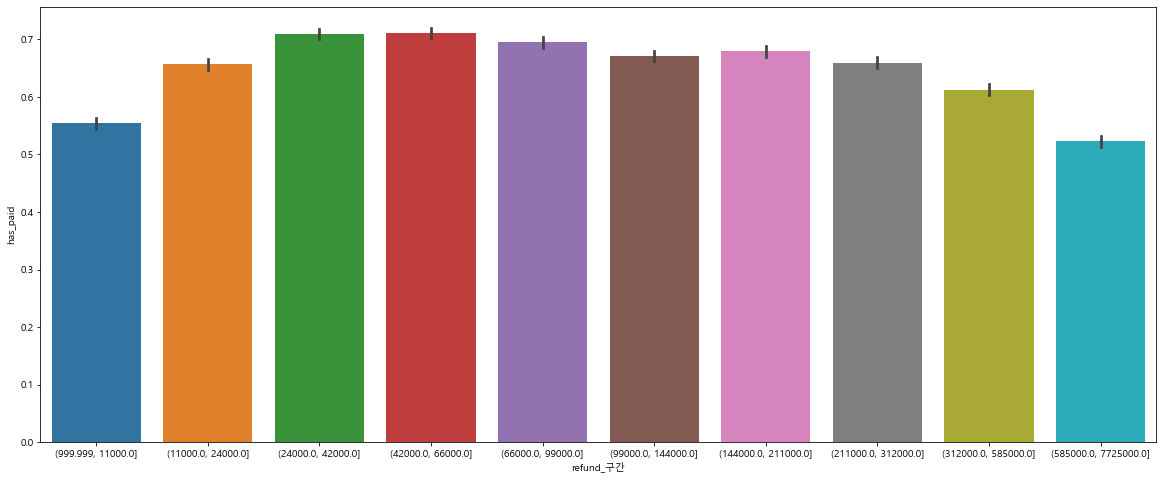

In [33]:
plt.figure(figsize=(20,8))
sns.barplot(data = df, 
            x='refund_구간',
            y= 'has_paid')

- 66,000원을 기준으로 수수료 결제율이 감소하는 추세를 보인다.
- **환급 예상액 0원~ 11,000원 구간의 10836명과 585,000원~7,725,000원 구간의 9988명의 경우 수수료 결제율이 낮으므로 이들을 대상으로 promotion을 진행할 필요가 있다.**

# Segment 나누기 3) 결제수수료별

In [34]:
df['fee'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

count    100000.000000
mean       7247.641000
std       11926.896979
min         400.000000
10%         400.000000
20%         400.000000
30%         400.000000
40%        1300.000000
50%        4300.000000
60%        4700.000000
70%        8100.000000
80%       11100.000000
90%       20800.000000
max      307000.000000
Name: fee, dtype: float64

In [35]:
# 임의의 9개의 구간으로 나누기
def fee_category(fee):
    category = ''
    if 0 < fee <= 400:
        category = '0~400원'
    elif 400 < fee <= 1300:
        category='400~1,300원'
    elif 1300 < fee <= 4300:
        category = '1,300~4,300원'
    elif 4300 < fee <= 8100:
        category = '4,300~8,100원'
    elif 8100 < fee <= 11100:
        category = '8,100~11,100원'
    elif 11100 < fee <= 20800:
        category = '11,100~20,800원'
    elif 20800 < fee <= 50000:
        category = '20,800~50,000원'
    elif 50000 < fee <= 100000:
        category = '50,000~100,000원'
    elif 100000 < fee <= 307000:
        category = '100,000~307,000원'
    return category

In [36]:
df['fee_구간'] = df['fee'].apply(fee_category)

In [37]:
df['fee_구간'].value_counts()

0~400원              33955
1,300~4,300원        15668
4,300~8,100원        10948
400~1,300원          10307
11,100~20,800원      10078
8,100~11,100원        9224
20,800~50,000원       8835
50,000~100,000원       824
100,000~307,000원      161
Name: fee_구간, dtype: int64

<AxesSubplot:xlabel='fee_구간', ylabel='has_paid'>

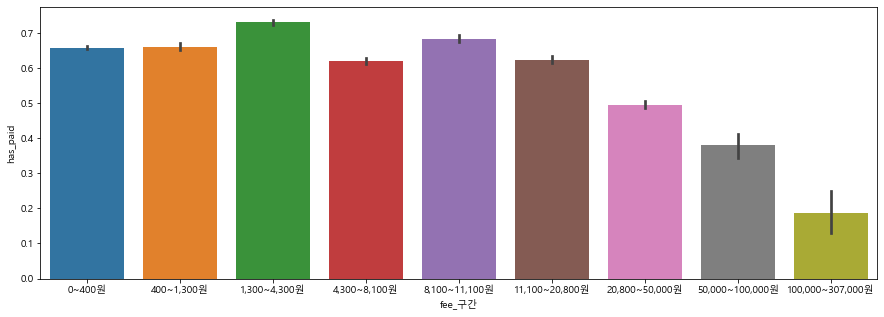

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(data = df, 
            x='fee_구간',
            y= 'has_paid',
           order = ['0~400원','400~1,300원','1,300~4,300원','4,300~8,100원','8,100~11,100원','11,100~20,800원',
                   '20,800~50,000원','50,000~100,000원','100,000~307,000원'])

In [39]:
df[df['fee']>11100].shape

(19898, 14)

- 수수료가 11,100원을 넘어가면서 수수료 결제율이 지속적으로 감소한다.
#### 수수료와 수수료 결제율은 상관관계가 있다.

# Segment 나누기 4) 예상환급액 대비 수수료별

In [126]:
pd.qcut(df['예상환급액_대비_수수료(%)'],10)

0          (4.886, inf]
1        (1.688, 1.977]
2        (3.959, 4.886]
3        (3.922, 3.959]
4        (3.333, 3.839]
              ...      
99995    (3.922, 3.959]
99996     (1.29, 1.688]
99997    (3.959, 4.886]
99998      (-inf, 1.29]
99999      (-inf, 1.29]
Name: 예상환급액_대비_수수료(%), Length: 100000, dtype: category
Categories (10, interval[float64]): [(-inf, 1.29] < (1.29, 1.688] < (1.688, 1.977] < (1.977, 2.622] ... (3.839, 3.922] < (3.922, 3.959] < (3.959, 4.886] < (4.886, inf]]

In [153]:
# 임의의 구간으로 나누기
def 수수료비율_category(수수료비율):
    category = ''
    if 수수료비율 <= 0:
        category = '0%'
    elif 0 < 수수료비율 <= 0.5:
        category='0~0.5%'
    elif 0.5 < 수수료비율 <= 1:
        category = '0.5~1%'
    elif 1 < 수수료비율 <= 1.5:
        category = '1~1.5%'
    elif 1.5 < 수수료비율 <= 2:
        category = '1.5~2%'
    elif 2 < 수수료비율 <= 2.5:
        category = '2~2.5%'
    elif 2.5 < 수수료비율 <= 3:
        category = '2.5~3%'
    elif 3 < 수수료비율 <= 3.5:
        category = '3~3.5%'
    elif 3.5 < 수수료비율 <= 4:
        category = '3.5~4%'
    elif 4 < 수수료비율 <= 4.5:
        category = '4~4.5%'
    elif 4.5 < 수수료비율 <= 5:
        category = '4.5~5%'  
    else:
        category = '5% 이상' 
    return category

In [154]:
df['예상환급액_대비_수수료(%)_구간'] = df['예상환급액_대비_수수료(%)'].apply(수수료비율_category)

In [155]:
df['예상환급액_대비_수수료(%)_구간'].value_counts()

3.5~4%    35633
1.5~2%    17048
5% 이상      8762
1~1.5%     8642
2.5~3%     8552
2~2.5%     7791
0.5~1%     5464
3~3.5%     3848
4~4.5%     2225
4.5~5%     1971
0%           64
Name: 예상환급액_대비_수수료(%)_구간, dtype: int64

In [156]:
df['예상환급액_대비_수수료(%)_구간'].value_counts().sort_index().index

Index(['0%', '0.5~1%', '1.5~2%', '1~1.5%', '2.5~3%', '2~2.5%', '3.5~4%',
       '3~3.5%', '4.5~5%', '4~4.5%', '5% 이상'],
      dtype='object')

<AxesSubplot:xlabel='예상환급액_대비_수수료(%)_구간', ylabel='has_paid'>

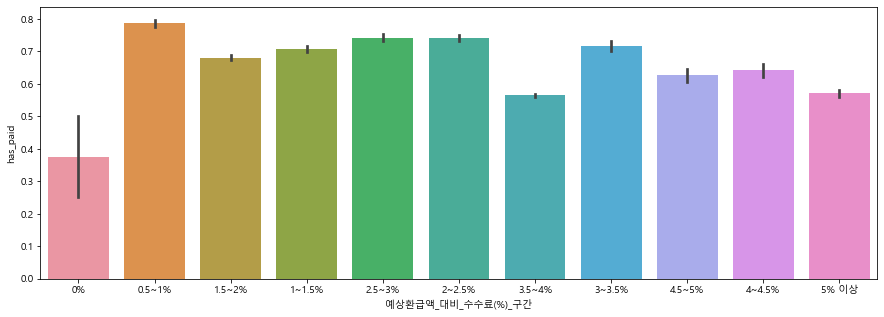

In [157]:
plt.figure(figsize=(15,5))
sns.barplot(data = df, 
            x='예상환급액_대비_수수료(%)_구간',
            y= 'has_paid',
           order = df['예상환급액_대비_수수료(%)_구간'].value_counts().sort_index().index)

- 예상환급액 대비 수수료가 3.5%~4%인 경우가 가장 많은 비중을 차지하는데, 가장 수수료 결제비율이 낮다.
#### 대체로 결제여부는 예상환급액 대비 수수료 비율보다는, "절대적인 수수료 액수 그 자체"에 영향을 더 많이 받는다.

# Segment 나누기 5) 근로소득별

In [40]:
df['income_근로'].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

count    1.000000e+05
mean     2.623921e+06
std      5.260655e+06
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
40%      0.000000e+00
50%      0.000000e+00
60%      0.000000e+00
70%      1.720000e+06
80%      4.649000e+06
90%      9.420000e+06
max      1.823350e+08
Name: income_근로, dtype: float64

In [41]:
# 임의의 구간으로 나누기
def income_근로_category(income_근로):
    category = ''
    if income_근로 == 0:
        category = '0원'
    elif 0 < income_근로 <= 100000:
        category='0~100,000원'
    elif 100000 < income_근로 <= 1000000:
        category = '100,000~1,000,000원'
    elif 1000000 < income_근로 <= 5000000:
        category = '1,000,000~5,000,000원'
    elif 5000000 < income_근로 <= 10000000:
        category = '5,000,000~10,000,000원'
    elif 10000000 < income_근로 <= 100000000:
        category = '10,000,000~100,000,000원'
    elif 100000000 < income_근로 <= 200000000:
        category = '100,000,000~200,000,000원'
    return category

In [42]:
df['근로소득_구간'] = df['income_근로'].apply(income_근로_category)

In [43]:
df['근로소득_구간'].value_counts()

0원                          60108
1,000,000~5,000,000원        14680
5,000,000~10,000,000원       10155
10,000,000~100,000,000원      8977
100,000~1,000,000원           5507
0~100,000원                    566
100,000,000~200,000,000원        7
Name: 근로소득_구간, dtype: int64

<AxesSubplot:xlabel='근로소득_구간', ylabel='has_paid'>

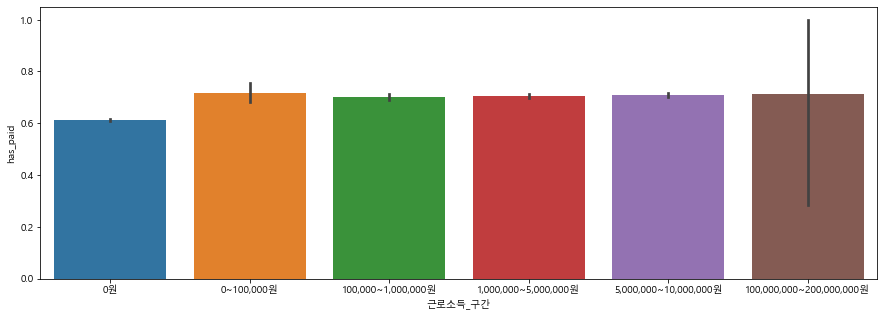

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data = df, 
            x='근로소득_구간',
            y= 'has_paid',
           order = ['0원','0~100,000원','100,000~1,000,000원','1,000,000~5,000,000원',
                    '5,000,000~10,000,000원','100,000,000~200,000,000원'])

- 근로소득과 수수료 결제율은 상관이 없어보인다.

# Segment 나누기 6) 사업소득별

In [45]:
pd.qcut(df['income_사업'],4)

0            (31000.0, 328000.0]
1              (-0.001, 31000.0]
2        (1235000.0, 39934000.0]
3        (1235000.0, 39934000.0]
4          (328000.0, 1235000.0]
                  ...           
99995          (-0.001, 31000.0]
99996      (328000.0, 1235000.0]
99997        (31000.0, 328000.0]
99998        (31000.0, 328000.0]
99999        (31000.0, 328000.0]
Name: income_사업, Length: 100000, dtype: category
Categories (4, interval[float64]): [(-0.001, 31000.0] < (31000.0, 328000.0] < (328000.0, 1235000.0] < (1235000.0, 39934000.0]]

In [46]:
df['income_사업'].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

count    1.000000e+05
mean     1.182567e+06
std      2.254789e+06
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      6.000000e+04
40%      1.610000e+05
50%      3.280000e+05
60%      5.890000e+05
70%      9.630000e+05
80%      1.566200e+06
90%      3.302100e+06
max      3.993400e+07
Name: income_사업, dtype: float64

In [47]:
# 임의의 구간으로 나누기
def income_사업_category(income_사업):
    category = ''
    if income_사업 <= 0:
        category = '0원'
    elif 0 < income_사업 <= 31000:
        category='0~31,000원'
    elif 31000 < income_사업 <= 60000:
        category = '31,000~60,000원'
    elif 60000 < income_사업 <= 161000:
        category = '60,000~161,000원'
    elif 161000 < income_사업 <= 328000:
        category = '161,000~328,000원'
    elif 328000 < income_사업 <= 589000:
        category = '328,000~589,000원'
    elif 589000 < income_사업 <= 1235000:
        category = '589,000~1,235,000원'
    elif 1235000 < income_사업 <= 1566200:
        category = '1,235,000~1,566,200원'
    elif 1566200 < income_사업 <= 3302100:
        category = '1,566,200~3,302,100원'
    elif 3302100 < income_사업 <= 40000000:
        category = '3,302,100~4000만원'
    return category

In [48]:
df['사업소득_구간'] = df['income_사업'].apply(income_사업_category)

In [49]:
df['사업소득_구간'].value_counts()

0원                      21830
589,000~1,235,000원      15018
3,302,100~4000만원        10000
1,566,200~3,302,100원    10000
161,000~328,000원         9988
328,000~589,000원         9988
60,000~161,000원          9937
1,235,000~1,566,200원     4981
31,000~60,000원           4816
0~31,000원                3442
Name: 사업소득_구간, dtype: int64

<AxesSubplot:xlabel='사업소득_구간', ylabel='has_paid'>

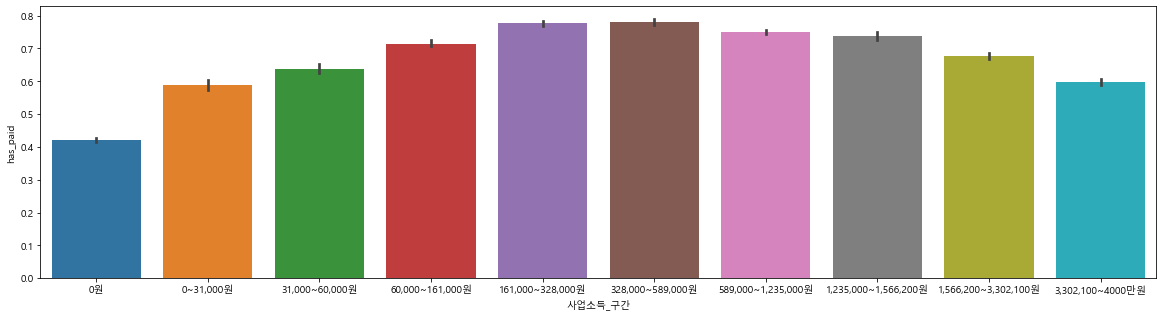

In [50]:
plt.figure(figsize=(20,5))
sns.barplot(data = df, 
            x='사업소득_구간',
            y= 'has_paid',
           order = ['0원','0~31,000원','31,000~60,000원','60,000~161,000원','161,000~328,000원','328,000~589,000원',
                    '589,000~1,235,000원','1,235,000~1,566,200원','1,566,200~3,302,100원','3,302,100~4000만원'])

- 사업 소득과 비례하여 수수료 결제 비율이 높아지다가, 약 60만원을 기점으로 결제 비율이 하락하는 모습을 보인다.
- 사업소득과 수수로 결제율은 상관관계가 있다.

# Segment 나누기 7) 기타소득별

In [51]:
df['income_기타'].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

count    1.000000e+05
mean     1.607252e+05
std      7.958761e+05
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
40%      0.000000e+00
50%      0.000000e+00
60%      0.000000e+00
70%      0.000000e+00
80%      6.400000e+04
90%      3.160000e+05
max      6.281000e+07
Name: income_기타, dtype: float64

In [52]:
# 임의의 구간으로 나누기
def income_기타_category(income_기타):
    category = ''
    if income_기타 <= 0:
        category = '0원'
    elif 0 < income_기타 <= 10000:
        category='0~10,000원'
    elif 10000 < income_기타 <= 100000:
        category = '10,000~100,000원'
    elif 100000 < income_기타 <= 500000:
        category = '100,000~500,000원'
    elif 500000 < income_기타 <= 1000000:
        category = '500,000~1,000,000원'
    elif 1000000 <income_기타 <=3000000:
        category = '1,000,000~3,000,000원'
    else:
        category = '300만원~'
    return category

In [53]:
df['기타소득_구간'] = df['income_기타'].apply(income_기타_category)

In [54]:
df['기타소득_구간'].value_counts()

0원                      74888
100,000~500,000원        10266
10,000~100,000원          7090
500,000~1,000,000원       3294
1,000,000~3,000,000원     2810
300만원~                   1040
0~10,000원                 612
Name: 기타소득_구간, dtype: int64

<AxesSubplot:xlabel='기타소득_구간', ylabel='has_paid'>

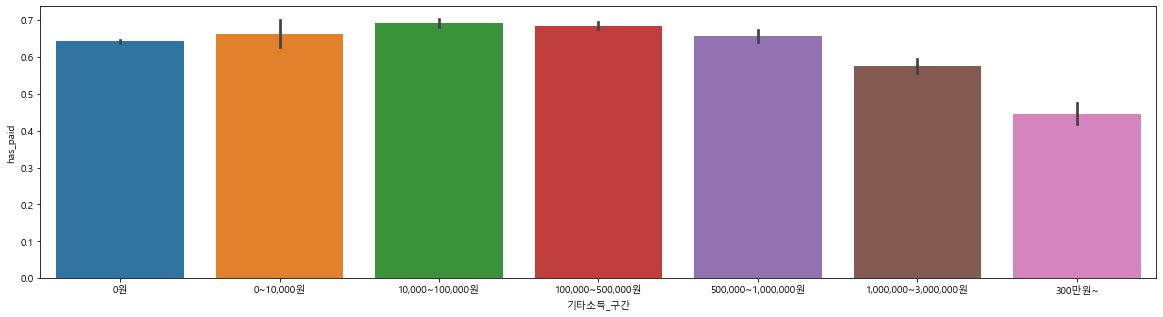

In [55]:
plt.figure(figsize=(20,5))
sns.barplot(data = df, 
            x='기타소득_구간',
            y= 'has_paid',
           order = ['0원','0~10,000원','10,000~100,000원','100,000~500,000원','500,000~1,000,000원','1,000,000~3,000,000원',
                    '300만원~'])

- 대부분의 기타소득이 0원임을 유념
- 약 50만원을 기점으로 50만원 이상의 경우 수수료 결제율이 감소한다.

# 정리
1. 2020년의 수수료 결제 비율이 줄어들어든 이유는 사업소득과 결제수수료가 매우 큰 폭으로 증가했기 때문이다. 따라서 귀속연도가 2020년인 경우 사업 소득이 높은 사람들을 대상으로 결제수수료와 관련한 action plan을 제시하는 것이 필요하다.
2. 환급 예상액 1,000원~ 11,000원 구간의 10,836명과 585,000원~7,725,000원 구간의 9,988명의 경우가 수수료 결제율이 낮으므로 이들 중 결제하지 않은 사람들 대상으로 action을 진행할 필요가 있다.
3. 수수료가 11,100원을 넘어가면서 수수료 결제율이 지속적으로 감소한다. 11,000원 이상의 수수료의 경우 사람들이 결제하는데 부담을 느낀다.
4. 예상환급액 대비 수수료가 3.5%~4%인 경우가 가장 많은 비중을 차지하는데, 가장 수수료 결제비율이 낮다.
5. 대체로 결제여부는 예상환급액 대비 수수료 비율보다는, 절대적인 수수료 액수 그 자체에 영향을 더 많이 받는다.
6. 사업소득이 16만원 이하인 그룹, 156만원 이상인 그룹을 대상으로 action을 진행할 필요가 있다.

- 위 대상들을 조합하여 한 depth 더 들어간 분석 필요
# Action Plan

1. 환급 예상액 1,000원~11,000원 구간
2. 환급 예상액 585,000원~7,725,000원 구간
3. 사업 소득이 16만원 이하인 그룹
4. 사업 소득이 150만원 이상인 그룹
5. 예상환급액 대비 수수료가 3.5%~4%인 그룹 

In [64]:
# 환급 예상액 1,000원~11,000원 구간
group1_paid = df.query('1000 < refund <=11000 and has_paid == 1' )
group1_non_paid = df.query('1000 < refund <=11000 and has_paid == 0' )

In [78]:
group1_non_paid['fee'].sum()

2098400.0

In [73]:
# 환급 예상액 585,000원~7,725,000원 구간
group2_paid = df.query('585000 < refund <= 7725000 and has_paid == 1' )
group2_non_paid = df.query('585000 < refund <=7725000 and has_paid == 0' )

In [79]:
group2_non_paid['fee'].sum()

179392300.0

In [81]:
# 사업 소득이 16만원 이하인 그룹
group3_paid = df.query('income_사업 <= 160000 and has_paid == 1' )
group3_non_paid = df.query('income_사업 <= 160000 and has_paid == 0' )

In [83]:
group3_non_paid['fee'].sum()

106595100.0

In [101]:
# 사업 소득이 156만원 이상인 그룹
group4_paid = df.query('income_사업 >= 1560000 and has_paid == 1' )
group4_non_paid = df.query('income_사업 >= 1560000 and has_paid == 0' )

In [102]:
group4_non_paid['fee'].sum()

169819600.0

In [173]:
group5_paid = df[(df['예상환급액_대비_수수료(%)_구간']=='3.5~4%') & df['has_paid']==1]
group5_non_paid = df[(df['예상환급액_대비_수수료(%)_구간']=='3.5~4%') & df['has_paid']==0]

In [174]:
group5_non_paid['fee'].sum()

459678000.0

## 단 한 그룹을 대상으로 action을 취한다면?
> ### 예상 환급액이 585,000원~7,725,000원 구간이고, 사업 소득이 156만원 이상이며, 예상환급액 대비 수수료가 3.5 - 4%인 그룹

In [183]:
# 예상 환급액이 585,000원~7,725,000원 구간이며 사업 소득이 156만원 이상인 그룹
group6_paid = df.query('585000 < refund <= 7725000 and income_사업 >= 1560000 and has_paid == 1')
group6_non_paid = df.query('585000 < refund <= 7725000 and income_사업 >= 1560000 and has_paid == 0')

In [187]:
# 예상 환급액이 585,000원~7,725,000원 구간이고 사업 소득이 156만원 이상이며 예상환급액 대비 수수료가 3.5 ~ 4%인 그룹
group6_paid = group6_paid[group6_paid['예상환급액_대비_수수료(%)_구간']=='3.5~4%']
group6_non_paid = group6_non_paid[group6_non_paid['예상환급액_대비_수수료(%)_구간']=='3.5~4%']

In [188]:
print(group6_paid.shape)
print(group6_non_paid.shape)

(2641, 18)
(3152, 18)


In [190]:
group6_non_paid['fee'].sum()

108158400.0

In [191]:
group6_paid.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액_대비_수수료(%),income_합계
count,2641.000000,2641.000000,2.641000e+03,2641.000000,2641.0,2.641000e+03,2.641000e+03,2.641000e+03,2641.000000,2.641000e+03
mean,30.534267,2018.895115,8.304915e+05,32791.291178,1.0,8.963730e+05,7.210174e+06,1.379016e+05,3.947756,8.244449e+06
std,8.335238,1.383609,2.691369e+05,10672.093311,0.0,2.062825e+06,3.378786e+06,7.297099e+05,0.030377,3.849298e+06
min,17.000000,2015.000000,5.860000e+05,23000.000000,1.0,0.000000e+00,1.563000e+06,0.000000e+00,3.526971,2.130000e+06
25%,25.000000,2018.000000,6.600000e+05,25900.000000,1.0,0.000000e+00,4.698000e+06,0.000000e+00,3.935484,5.370000e+06
50%,28.000000,2020.000000,7.580000e+05,29800.000000,1.0,0.000000e+00,6.440000e+06,0.000000e+00,3.952180,7.440000e+06
75%,33.000000,2020.000000,9.140000e+05,36100.000000,1.0,8.740000e+05,9.012000e+06,0.000000e+00,3.964687,1.007500e+07
max,70.000000,2020.000000,5.119000e+06,203200.000000,1.0,2.467600e+07,3.266500e+07,1.770200e+07,3.983957,3.484800e+07


In [192]:
group6_non_paid.describe()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타,예상환급액_대비_수수료(%),income_합계
count,3152.000000,3152.000000,3.152000e+03,3152.000000,3152.0,3.152000e+03,3.152000e+03,3.152000e+03,3152.000000,3.152000e+03
mean,30.154188,2019.436865,8.683093e+05,34314.213198,0.0,6.475029e+05,7.548142e+06,2.065181e+05,3.949995,8.402163e+06
std,8.243999,1.131112,3.354251e+05,13336.087478,0.0,1.797140e+06,3.592968e+06,1.587988e+06,0.019325,4.141355e+06
min,17.000000,2016.000000,5.860000e+05,23000.000000,0.0,0.000000e+00,1.575000e+06,0.000000e+00,3.589527,2.124000e+06
25%,25.000000,2020.000000,6.730000e+05,26400.000000,0.0,0.000000e+00,4.741000e+06,0.000000e+00,3.937330,5.287250e+06
50%,28.000000,2020.000000,7.895000e+05,31000.000000,0.0,0.000000e+00,6.798000e+06,0.000000e+00,3.952435,7.542500e+06
75%,33.000000,2020.000000,9.540000e+05,37800.000000,0.0,0.000000e+00,9.542750e+06,0.000000e+00,3.964211,1.034400e+07
max,68.000000,2020.000000,6.054000e+06,240600.000000,0.0,3.408500e+07,2.117100e+07,6.281000e+07,3.983871,7.020900e+07


In [195]:
print(group6_paid['fee'].median(), group6_non_paid['fee'].median())

29800.0 31000.0


In [196]:
group6_non_paid['fee'].median() - group6_paid['fee'].median()

1200.0

In [198]:
group6_non_paid['fee'].mean() - group6_paid['fee'].mean()

1522.9220203852892

## 수수료를 결제하지 않은 3152명을 대상으로 수수료를 1500원씩 인하한다면?
- 쿠폰 발행
- 페이백

In [203]:
(group6_non_paid['fee'] - 1500).mean()

32814.21319796954

In [204]:
3152 * (group6_non_paid['fee'] - 1500).mean()

103430399.99999999

In [208]:
round(103430399.99999999)

103430400

### 결론: 최대 103,430,400원의 수익을 얻을 수 있을 것이다.

### *참고로 autoML활용한 경우 결제에 영향을 미치는 요인은 다음과 같음. 
(2)에 작성한 내용

<LGBM 모델 사용>

feature importance
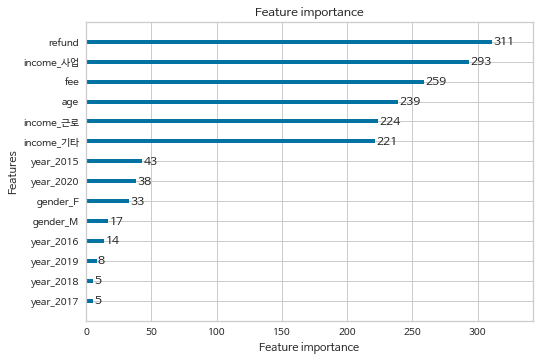

permuatation importance
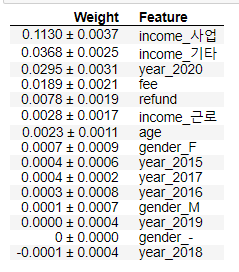